# Project Zillow

- Predict the tax assessed property value of Zillow Single Family Residential properties with transaction dates in 2017.


# Goal

- Identify drivers of property value.
- Use drivers to develop a machine learning model to predict Single Family Residential property value.

# Imports

In [1]:
# local
from wrangle import acquire_zillow, clean_zillow, wrangle_zillow, train_val_test, split_and_scale_data, xy_split
from explore import dist_of_data, plot_variable_pairs, plot_categorical_and_continuous_vars, evaluate_correlation, analysis_1, analysis_2, analysis_3, analysis_4, data_visual
from evaluate import plot_residuals, regression_errors, baseline_mean_errors, better_than_baseline
from model import eval_model, train_model, scale_data, wrangle_zillow_and_train_model, model_1, model_xy, model_2, model_3, final_model
from feature_engineer import select_k_features

# Acquire

- Data acquired from Codeup MySQL DB
- Data initially acquired on 7 Sep, 2023.
- It contained 52,441 rows and 15 columns before cleaning.
- Each row represents a unique parcel for each transaction it had in 2017.
- Each column represents an element of the parcel.

# Prepare

**Prepare Actions:**
 - list actions taken

In [2]:
# Data Wrangle and Split function
df = wrangle_zillow()
train, val, test = train_val_test(df)

### Quick view of data,

In [3]:
# displaying first five rows of zillow dataframe.
train.head()

,parcel_id,latitude,longitude,lot_area,region_id_county,region_id_zip,property_county_landuse_code,property_zoning_desc,bathrooms,bedrooms,...,n-ac_ind,n-heat_ind,n-prop_type,state,Los Angeles County,Orange County,Ventura County,Small,Medium,Large
342,12783912,33986872.0,-118028470.0,16224,3101,96169,0100,WHR1*,2.0,4,...,1,1,Home,California,1,0,0,0,0,1
13632,14022976,33712876.0,-117885959.0,6000,1286,97004,122,LAR1,2.0,3,...,0,0,Home,California,0,1,0,0,1,0
18849,13072833,34041693.0,-117852600.0,7978,3101,96522,0100,WAC3-RPD28,2.0,3,...,1,1,Home,California,1,0,0,0,1,0
29015,12189985,33976963.0,-118285365.0,5400,3101,96025,0100,LAR2,1.0,2,...,0,0,Home,California,1,0,0,0,1,0
25542,14190405,33885799.0,-117808717.0,19267,1286,97078,122,LAR1,3.0,4,...,0,0,Home,California,0,1,0,0,0,1


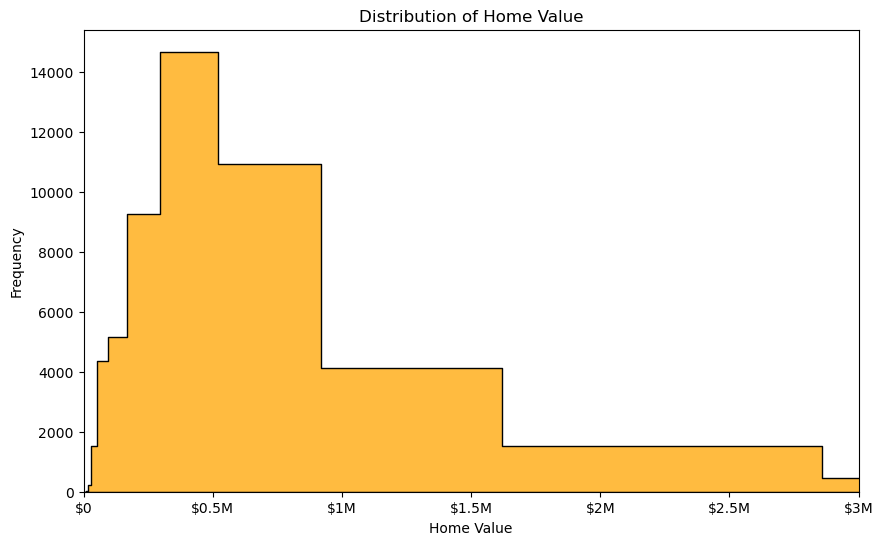

In [4]:
dist_of_data(df, 'home_value')

# Explore

## Question 1

* Does bedrooms have a relationship with home_value?
  
<!--bedrooms is categorical and home_value is continous-->

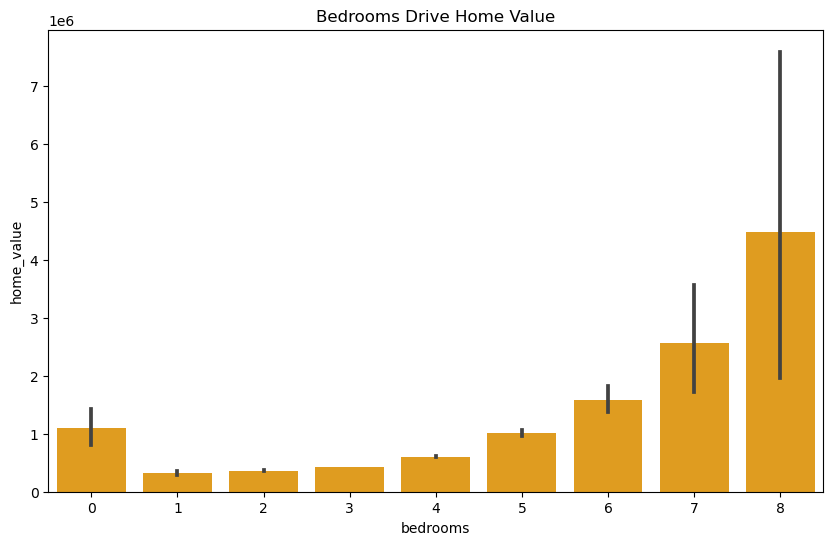

In [5]:
analysis_1(train)

**Takeaway:**  
bedrooms clearly have a relationship that appears linear. This will be a good feature to use to predict single family residential properties in the modeling phase.

## Question 2

* Does home_value have a correlation with year built?

home_value is continous and year_built is categorical

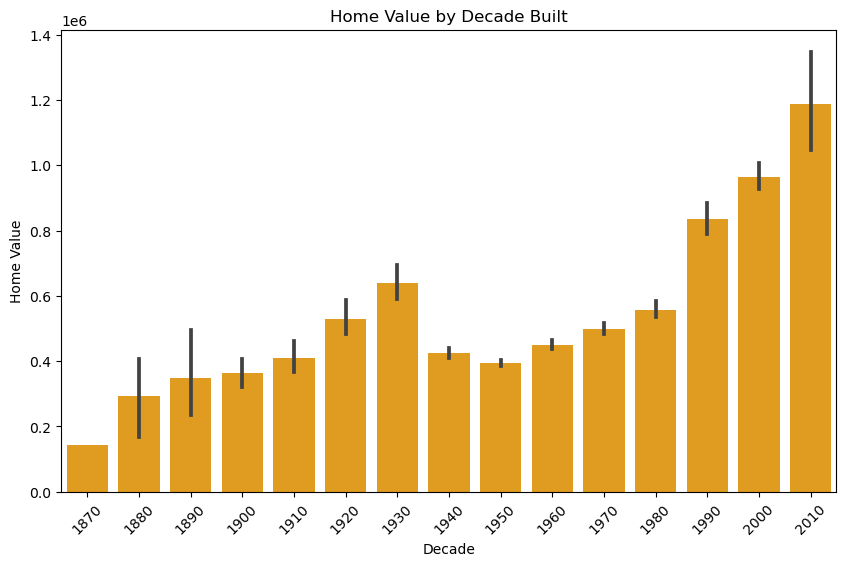

In [6]:
analysis_2(train)

**Takeaway:**  
Home value and year built by decade show a linear relationship. This will be a good feature to use to predict single family residential properties in the modeling phase.

# Question 3  

- Does home_value have a correlation with area?  
<!--homw_value and area is continous.-->

**Null Hypothesis($H0$):** There is **a significant correlation** between the area of the property and home value.  

**Alternative Hypothesis($Ha$):** There **is no significant correlation** between area of the property and home value.



There is a statistically significant correlation between Area and Home Value.

p-value: 0.0




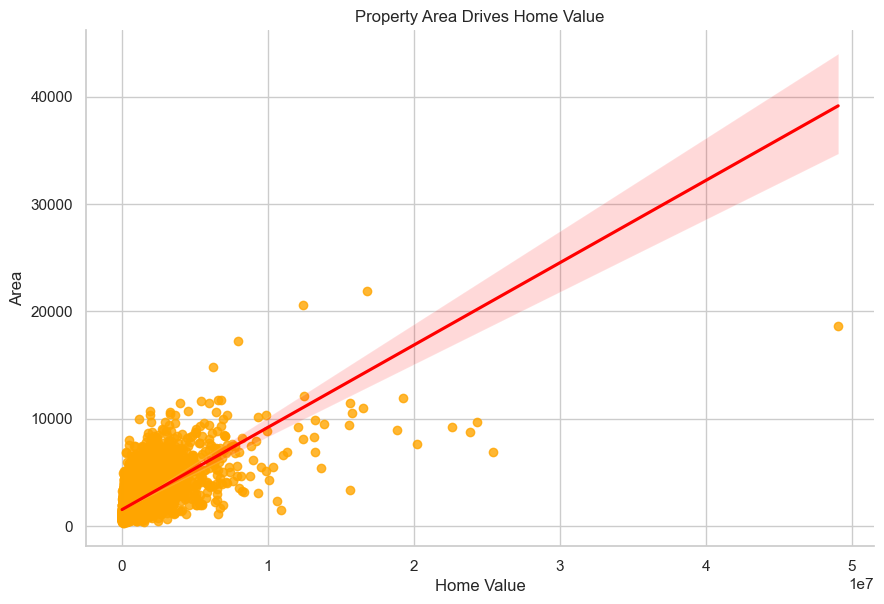

In [7]:
analysis_3(train)

# Question 4

- Does home_value have a correlation with the property lot area?  
<!--homw_value and area is continous.-->

**Null Hypothesis($H0$):** There is **a significant correlation** between the lot area of the property and home value.  

**Alternative Hypothesis($Ha$):** There **is no significant correlation** between lot area of the property and home value.



There is a statistically significant correlation between Lot Area and Home Value.

Correlation Coefficient: 0.1556

p-value: 9.429702768094296e-198




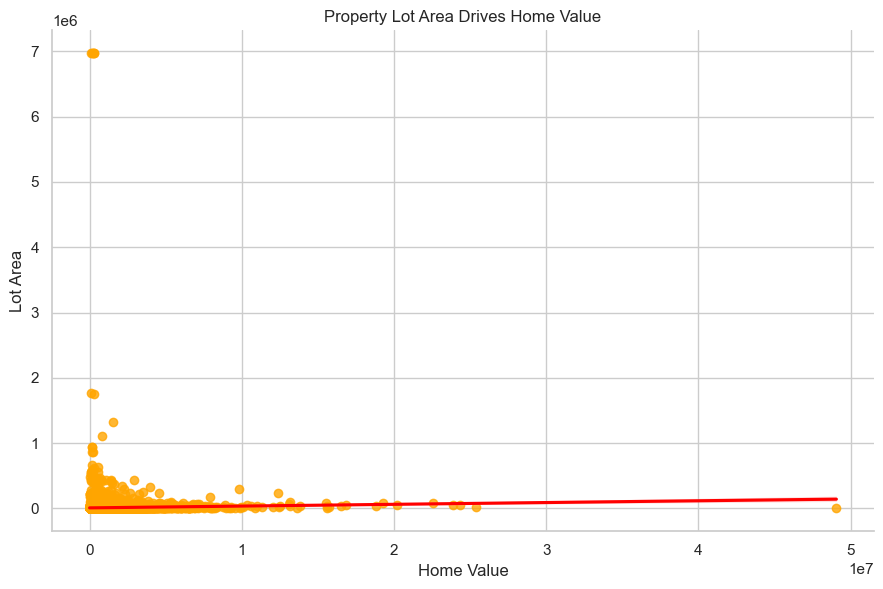

In [8]:
analysis_4(train)

 answer takeaway

# Explore Summary

- The datset consist of alot of LA county homes,
- All counties are in the state of california.
- There is a right skew to quite a few dsitributions between categorical and continuous data.
- home value is on the lower range of the scale when they are all compared.
- larger homes exists in ventura county as well as the number of room_cnt and lot_area versus the other counties.
- most properties are listed with 0 in la county, i'm not entirely sure why, may be an issue
- the data is proportionate with home detail features versus geolocation and outside markers for single residential properties.

# Features for modeling

* **Features that will be used:**
  * *home_value*(target)  
 

* **Some features that may be useful:**  
    * *parcel_id*
    * *bathrooms*
    * *bedrooms*
    * *area*
    * *full_bath_cnt*
    * *latitude*
    * *longitude*
    * *lot_area*
    * *region_id_county*
    * *regionidzip*
    * *room_cnt*
    * *year_built*
    * *census_tract_and_block*
    * *fips*
    * *state*
    * *county*

# Modeling

Root Mean Squared Error and Calculated Model Significance will be the evaluation metric

Given more time I could gather more data and experiment with the hyperparameter configurations providing possibly a better significance and lower RMSE.

Target feature is home_value

Baseline RMSE is apprximately $716,000

Models will be developed and evaluated using 2 model different hyperparameter set for different features used.

RandomForestRegresssor
XGBoostRegressor

Models will be evaluated on train and validate datasets
Best performing model will be the only one evaluated on the test dataset.

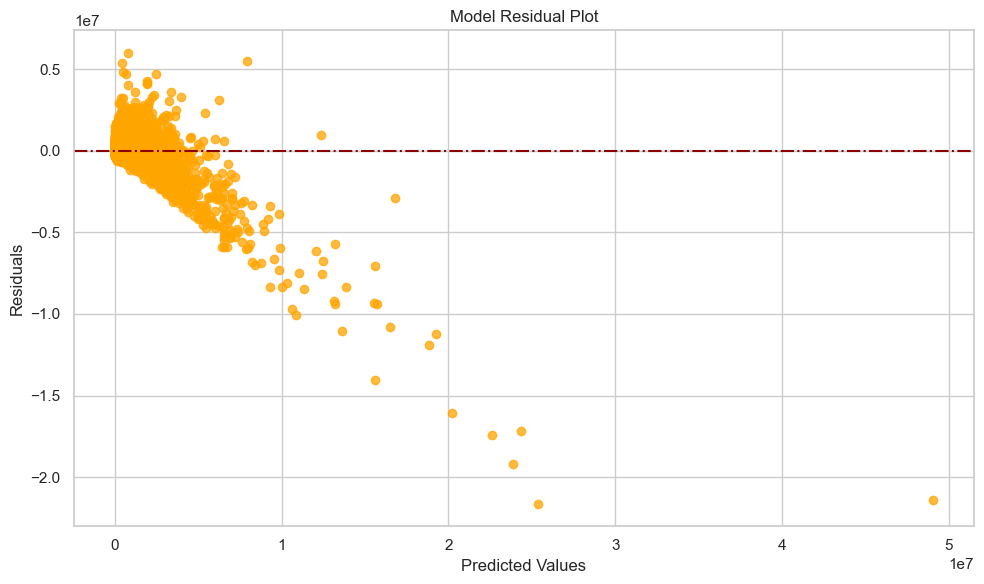


-------------------------------------

Model RMSE: 573461.85


-------------------------------------

Baseline RMSE: 796674.90


-------------------------------------

Is the model better than the baseline? True


In [9]:
wrangle_zillow_and_train_model()

## Best of 3 model configurations

- selectkbest used for feature importance selcetion

In [10]:
selected_features = select_k_features(train)
selected_features.to_list()

['area',
 'finished_square_feet_12',
 'finished_sqft_15',
 'finishedsqft50',
 'n-total_rooms']

In [11]:
X_train, y_train, X_val, y_val, X_test, y_test = model_xy()

## Model 1

In [ ]:
trained_model = model_1(X_train, y_train, X_val, y_val)

## Model 2

In [ ]:
model2_results = model_2(train, 'home_value', X_val, y_val, params=None)

## Model 3

In [ ]:
model_3 = model_3()

## Best on Test

- XGBRegressor Algorithm performed best on the Test modeled data

In [ ]:
final_results = final_model(train, 'home_value', X_test, y_test, params=None)

## Model Summary

Linear Regression and Lasso Lars had similar RMSE and R2 for train and validate, RMSE about 287k/290k and R2 about 0.4158/0.397
Polynomial Features had the best performance for train and validate, RMSE was the smallest 266k/274k and R2 was the largest 0.4996/0.464
With the test done on Polynomial Features, we get RMSE 270k and R2 0.4851
It's an okay model but if the predictions could be off by 270k then I think the model could be improved more

# Conclusion

## Takeaways and Key findings

- Home details like the calculated area of home, lot area, bedrooms, bathrooms, full bathrooms, year built drive home value.
- Calculated area is the most important feature across all features.
- There higher priced adn larger single redidential family properties seems to be concentrated in ventura county and less larger  homes are spread on ornage and los angeles county

- The younger the property the better for property value- e bigger the living area the bigger the property value- 
Location matters for property valu- e
Model still needs improvement

## Recommendations

- If i had more time I would want to gatehr more data and maybe fill null values with imputations that closely resemble data and also feature engineer data to include new features and possibily fine tune parameter for these models.m